## Can we predict whether a wine is red or white based on the wine's physiochemical properties? Which model is best for such a classification? 

### Here I used logistic regression to start with. Then I used the K Nearest Neighbors Classifier and fine-tuned the model's hyperparameters. 

In [89]:
#imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [90]:
# read the data into a pandas dataframe
wine_df = pd.read_csv('wine.csv')

In [91]:
# show the first few rows of the dataframe
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0


In [92]:
# I used statsmodels to run a logistic regression model so that we can identify the relevant features
#imports 
import statsmodels.api as sm

In [96]:
# specify all of the features
X = wine_df.columns[:10]

In [98]:
# run the model
logit = sm.Logit(wine_df['is_red'], wine_df[X])
 
# fit the model
result = logit.fit()

# print the summary tables 
print result.summary()

Optimization terminated successfully.
         Current function value: 0.047047
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 is_red   No. Observations:                 6497
Model:                          Logit   Df Residuals:                     6487
Method:                           MLE   Df Model:                            9
Date:                Thu, 14 May 2015   Pseudo R-squ.:                  0.9157
Time:                        13:08:06   Log-Likelihood:                -305.66
converged:                       True   LL-Null:                       -3625.5
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
fixed_acidity            1.6497      0.135     12.258      0.000         1.386     1.91

Here we find that all of the features were significantly related to our wine color prediction, except for citric_acid and residual_sugar. But, even with those features in our mode, we have a 91.6% r-squared value. So, for now, I will leave all of the features in the model. 

Let's see if KNN classifier would do a better job! 

In [100]:
# Here I use scikit-learn to fit a KNN classifier because it allows you to tune the hyperparameters of the model
# imports 
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [101]:
# specify your target variable
Y = wine_df['is_red']

In [103]:
# run the classifier with K = 5 to start with... 
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(wine_df[X], Y)
clf.score(wine_df[X], Y)

0.95428659381252889

A 95% score is really great! But, remember that this uses the whole dataset for training. The score could be different when the model is used to predict new data. Also, how do we know which value of K is appropriate? 

For this, we can manually divide up the data into training and testing and trying different values of K (generally best to use odd numbers) and see how the model accuracy changes. 

In [104]:
# divide your data into training and testing manually so that you can decide which value of Kneighbors (n) is 
# appropriate 

test_idx = np.random.uniform(0, 1, len(wine_df)) <= 0.3
train = wine_df[test_idx==True]
test = wine_df[test_idx==False]

In [105]:
features= ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
           'total_sulfur_dioxide','density','pH','sulphates']

Neighbors: 1, Accuracy: 0.914786
Neighbors: 3, Accuracy: 0.922015
Neighbors: 5, Accuracy: 0.928368
Neighbors: 7, Accuracy: 0.930559
Neighbors: 9, Accuracy: 0.929463
Neighbors: 11, Accuracy: 0.929901
Neighbors: 13, Accuracy: 0.931216
Neighbors: 15, Accuracy: 0.932749
Neighbors: 17, Accuracy: 0.932749
Neighbors: 19, Accuracy: 0.933406
Neighbors: 21, Accuracy: 0.933625
Neighbors: 23, Accuracy: 0.933625
Neighbors: 25, Accuracy: 0.934283
Neighbors: 27, Accuracy: 0.934283
Neighbors: 29, Accuracy: 0.933406
Neighbors: 31, Accuracy: 0.933625
Neighbors: 33, Accuracy: 0.933844
Neighbors: 35, Accuracy: 0.934502
Neighbors: 37, Accuracy: 0.933625
Neighbors: 39, Accuracy: 0.933406
Neighbors: 41, Accuracy: 0.933406
Neighbors: 43, Accuracy: 0.933187
Neighbors: 45, Accuracy: 0.933625
Neighbors: 47, Accuracy: 0.933187
Neighbors: 49, Accuracy: 0.934064


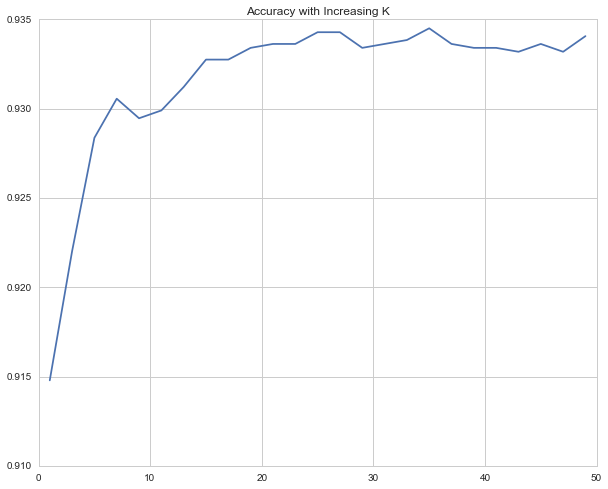

In [108]:
# This function will print model accuracy on test data as a function of n and plot this relationship 

results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['is_red'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['is_red'], 1, 0).sum() / float(len(test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)
 
    results.append([n, accuracy])
 
results = pd.DataFrame(results, columns=["n", "accuracy"])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.show()

You can see that the model accuracy asymptotes at around 0.934ish, when n = 13. So, I will choose n = 13. 

One more hyperparameter that is relevant is how we calculate the euclidean distance. You can adjust this parameter by specifying the "weights". You can choose between uniform, distance, and log weights. Here I repeat the above step and identify which weight type gives the highest model accuracy score.

In [110]:
results = []
for w in ['uniform', 'distance', lambda x: np.log(x)]:
    clf = KNeighborsClassifier(weights=w, n_neighbors = 13)
    w = str(w)
    clf.fit(train[features], train['is_red'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['is_red'], 1, 0).sum() / float(len(test))
    print "Weights: %s, Accuracy: %3f" % (w, accuracy)
 
    results.append([w, accuracy])
 
results = pd.DataFrame(results, columns=["weight_method", "accuracy"])
print results

Weights: uniform, Accuracy: 0.931216
Weights: distance, Accuracy: 0.938226
Weights: <function <lambda> at 0x1384f8848>, Accuracy: 0.891566
                        weight_method  accuracy
0                             uniform  0.931216
1                            distance  0.938226
2  <function <lambda> at 0x1384f8848>  0.891566


You can see that with n = 13 and weights = distance, we get the best accuracy score = 0.938

Now we can test our model more rigorously using a 10-fold cross-validation 

In [114]:
# imports for cross validation
from sklearn.cross_validation import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(KNeighborsClassifier(n_neighbors = 13, 
                        weights = 'distance'),wine_df[X], Y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.90307692  0.92153846  0.95230769  0.94153846  0.94        0.93692308
  0.95692308  0.93076923  0.93528505  0.95216049]
0.937052247083


Great! The model is still performing with a mean accuracy of 0.937! 